In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv(r'C:\Users\vmffl\workspace\우리은행 데이터경진대회 데이터셋\우리은행 데이터경진대회 데이터셋.csv',index_col=0)
data.shape

(119535, 93)

In [2]:
data.head()

,TARGET,J_F1_LON_RK_3M_CNT_RE,J_F1_OTHER_LON_6M_AVBL_AM_RE,J_F1_OTHER_LON_MAX_3M_AM_RE,J_SHINBO_GIBO_AM_RE,J_TOT_LON_CNT_RE,J_TOT_LON_AGG_AM_RE,J_TOT_LON_MAX_AM_RE,J_DPS_CT_BAL_AM_RE,J_TOT_DPS_1M_AVBL_AM_RE,...,P_BR_CNTC_1M_CNT_RE,P_BR_CNTC_6M_CNT_RE,P_ATM_CNTC_6M_CNT_RE,P_INT_CNTC_6M_CNT_RE,P_TOT_LON_CNT_RE,P_TOT_LON_AGG_AM_RE,P_TOT_TS_6M_CNT_RE,P_TOT_TS_6M_AM_RE,P_OB_TS_6M_CNT_RE,P_OB_TS_6M_AM_RE
1,0,2,3,4,1,2,3,3,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,2,3,1,1,1,1,3,3,...,1,3,3,1,1,1,3,3,3,3
3,0,2,3,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,3,3,4,1,4,4,4,1,1,...,3,3,3,1,3,3,1,1,1,1
5,0,3,3,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119535 entries, 1 to 119535
Data columns (total 93 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   TARGET                        119535 non-null  int64
 1   J_F1_LON_RK_3M_CNT_RE         119535 non-null  int64
 2   J_F1_OTHER_LON_6M_AVBL_AM_RE  119535 non-null  int64
 3   J_F1_OTHER_LON_MAX_3M_AM_RE   119535 non-null  int64
 4   J_SHINBO_GIBO_AM_RE           119535 non-null  int64
 5   J_TOT_LON_CNT_RE              119535 non-null  int64
 6   J_TOT_LON_AGG_AM_RE           119535 non-null  int64
 7   J_TOT_LON_MAX_AM_RE           119535 non-null  int64
 8   J_DPS_CT_BAL_AM_RE            119535 non-null  int64
 9   J_TOT_DPS_1M_AVBL_AM_RE       119535 non-null  int64
 10  J_TOT_DPS_6M_AVBL_AM_RE       119535 non-null  int64
 11  J_CORE_DPS_1M_AVBL_AM_RE      119535 non-null  int64
 12  J_CORE_DPS_6M_AVBL_AM_RE      119535 non-null  int64
 13  J_TOT_DPS_ACC_

INT 자료형을 CATEGORICAL 자료형으로 변환. 서열척도라고 판단해서 원핫코딩 및 더미코딩을 진행하지 않았음

In [4]:
for col_name in data.columns:
    data[col_name]=pd.Categorical(data[col_name])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119535 entries, 1 to 119535
Data columns (total 93 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   TARGET                        119535 non-null  category
 1   J_F1_LON_RK_3M_CNT_RE         119535 non-null  category
 2   J_F1_OTHER_LON_6M_AVBL_AM_RE  119535 non-null  category
 3   J_F1_OTHER_LON_MAX_3M_AM_RE   119535 non-null  category
 4   J_SHINBO_GIBO_AM_RE           119535 non-null  category
 5   J_TOT_LON_CNT_RE              119535 non-null  category
 6   J_TOT_LON_AGG_AM_RE           119535 non-null  category
 7   J_TOT_LON_MAX_AM_RE           119535 non-null  category
 8   J_DPS_CT_BAL_AM_RE            119535 non-null  category
 9   J_TOT_DPS_1M_AVBL_AM_RE       119535 non-null  category
 10  J_TOT_DPS_6M_AVBL_AM_RE       119535 non-null  category
 11  J_CORE_DPS_1M_AVBL_AM_RE      119535 non-null  category
 12  J_CORE_DPS_6M_AVBL_AM_RE      

타겟 변수에 1 비율이 매우 낮음. 데이터의 불균형이 심각함.

In [6]:
data['TARGET'].value_counts()

0    118720
1       815
Name: TARGET, dtype: int64

In [7]:
data['TARGET'].value_counts(normalize = True)

0    0.993182
1    0.006818
Name: TARGET, dtype: float64

<AxesSubplot:>

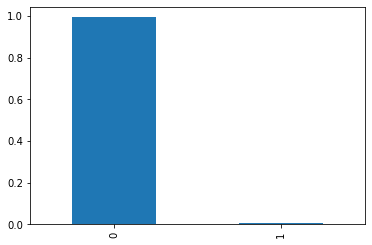

In [8]:
data['TARGET'].value_counts(normalize=True).plot(kind='bar')

train, test 데이터 분할(테스트 데이터 비율 20%)

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data,test_size=0.2, random_state=100)
print(train_data.shape)
print(test_data.shape)

(95628, 93)
(23907, 93)


train, test 데이터 속 target 데이터의 비율 확인

In [10]:
train_data['TARGET'].value_counts()

0    94969
1      659
Name: TARGET, dtype: int64

In [11]:
test_data['TARGET'].value_counts()

0    23751
1      156
Name: TARGET, dtype: int64

In [54]:
print(train_data['TARGET'].value_counts()/train_data['TARGET'].shape[0]*100)

0    99.310871
1     0.689129
Name: TARGET, dtype: float64


In [55]:
print(test_data['TARGET'].value_counts()/test_data['TARGET'].shape[0]*100)

0    99.347471
1     0.652529
Name: TARGET, dtype: float64


In [13]:
X_trn=train_data.iloc[:,1:]
y_trn=train_data['TARGET']
X_tes=test_data.iloc[:,1:]
y_tes=test_data['TARGET']

SMOTEN 을 이용해서 TRAINING DATA를 오버샘플링

In [14]:
from imblearn.over_sampling import SMOTEN
smoten = SMOTEN()
X_trn_over, y_trn_over = smoten.fit_resample(X_trn,y_trn)

sampling 된 타겟 데이터의 0과 1의 비율이 같아진 것을 확인할 수 있다.

In [15]:
y_trn_over.value_counts()

0    94969
1    94969
Name: TARGET, dtype: int64

In [16]:
X_trn_over.shape

(189938, 92)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve
 

def get_eval(y_test,pred=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    precision2=precision_score(y_test,pred,pos_label=0)
    recall2=recall_score(y_test,pred,pos_label=0)
    f1_2=f1_score(y_test,pred,pos_label=0)
    print("confusion matrix")
    print(confusion)
    print('accuracy : {0:.4f} , precision : {1:.4f} , recall : {2:.4f}, F1 score : {3:.4f} \n precision(0) : {4:.4f} , recall(0) : {5:.4f}, f1(0) : {6:.4f}'.format(accuracy,precision, recall,f1,precision2,recall2,f1_2))

oversampling 되지 않은 데이터로 모델을 학습시켰을때, 데이터의 비율이 큰 0에 관해서는 높은 precision, recall, f1 score 값을
보여주지만 데이터의 비율이 적은 1에 대해서는 현저히 적은 precision, recall, f1 score 값을 보여준다.

In [18]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter = 1000)
clf.fit(X_trn,y_trn)
pred=clf.predict(X_tes)
get_eval(y_tes,pred)

confusion matrix
[[23751     0]
 [  156     0]]
accuracy : 0.9935 , precision : 0.0000 , recall : 0.0000, F1 score : 0.0000 
 precision(0) : 0.9935 , recall(0) : 1.0000, f1(0) : 0.9967


C:\Users\vmffl\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오버샘플링 된 데이터로 모델을 학습시켰을때, accuracy 값을 소폭 하향되었으나 데이터의 비율이 적은 1에 대해서 recall 값이 크게 상승하였다.
하지만 precision, f1 score값에 대해서는 상승폭이 크지 않다

In [21]:
clf2=LogisticRegression(max_iter=1000)
clf2.fit(X_trn_over,y_trn_over)
pred2=clf2.predict(X_tes)
get_eval(y_tes,pred2)

confusion matrix
[[20847  2904]
 [   33   123]]
accuracy : 0.8771 , precision : 0.0406 , recall : 0.7885, F1 score : 0.0773 
 precision(0) : 0.9984 , recall(0) : 0.8777, f1(0) : 0.9342


precision 값을 올리기 위해 임계값(threshold)값을 조정해보자. threshold 값이 올라갈수록 recall 값은 떨어지고 precision 값을 올라감. 

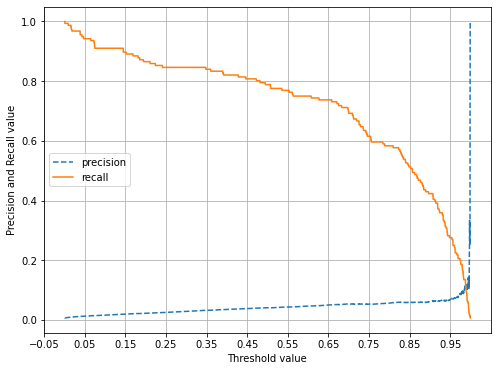

In [22]:
from sklearn.metrics import precision_recall_curve

predict_prob_class1=clf2.predict_proba(X_tes)[:,1]

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_cl):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_cl)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_tes, predict_prob_class1)

ROC 곡선과 AUC

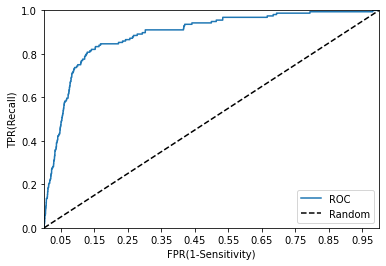

In [25]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label = 'ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_tes, predict_prob_class1)

In [28]:
roc_auc_score(y_tes, predict_prob_class1)

0.8895934476173203